# Project: Investigate a Dataset on Patients Not Showing-up for their appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is
focused on the question of whether or not patients show up for their appointment.

> **Features :**
- PatientId - indicates the identification number of the patient 
- AppointmentID - indicates the identification of an Appointment 
- AppointmentDay - indicates the day the patient set for an appointment
- ScheduledDay - indicates the day the patient set up their appointment
- Age - indicates how old the Patient is 
- Neighbourhood - indicates the day the patient set up their appointment. 
- Scholarship - indicates whether or not the patient is enrolled in Brasilian welfare program <a href='https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia'>Bolsa Família</a>. (True or False)   
- Hipertension - indicates whether or not the patient has hypertension (True or False)
- Diabetes - indicates whether or not the patient has diabetes (True or False)
- Alcoholism - indicates whether or not the patient is an alcoholic (True or False)
- Handcap - indicates whether or not the patient is a Handicap (True or False)
- SMS_received - indicates whether or not the patient received 1 or more message 
- No-show - indicates whether or not the patient shows up for their appointment (True or False where the column says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up)

>**Question to Investigate :**
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [1]:
# import and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
# dimensions of the dataset
# number of rows and columns of the dataset
df.shape

(110527, 14)

In [3]:
# summary of data in the dataset - data types, columns with missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# number of unique values on columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can see there some duplicate `PatientId` indicating there are some patients with more than 1 appointment on the dataset

In [5]:
# view if there are duplicate records
df.duplicated().sum()

0

From above we can see the dataset does not have duplicated data or missing data
However, the data types on `ScheduledDay` and `AppointmentDay` is a string object instead of a datetime object

In [6]:
# descriptive statistics for numeric data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As indicated above : Patients Ages range from -1 to 115 with a mean of 37 years and atleast 75% of the Patients with ages 55 and below 

### Data Cleaning
> On this section we will address
- incorrect data types
- rename column names
- remove columns not used in Data Analysis

In [7]:
# Renaming columns for easier access without square-brackets and for grammatical purposes
df.rename(columns={'No-show':'No_show', 'Hipertension':'Hypertension', 'Handcap': 'Handicap'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Converting ScheduledDay and AppointmentDay to `datetime` objects**

As shown above the datatype for the two is `string` - we need to convert them to perform further operations on them

In [8]:
## First change to datetime dtype
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.iloc[:, np.r_[1, 3, 4]].tail()

,AppointmentID,ScheduledDay,AppointmentDay
110522,5651768,2016-05-03 09:15:35,2016-06-07
110523,5650093,2016-05-03 07:27:33,2016-06-07
110524,5630692,2016-04-27 16:03:52,2016-06-07
110525,5630323,2016-04-27 15:09:23,2016-06-07
110526,5629448,2016-04-27 13:30:56,2016-06-07


We want to find out the time period between the `ScheduledDay` and the `AppointmentDay`, therefore there's a need to have a similar dateFormat `YYYY-mm-dd` on the 2 columns - then create a new column with time difference in days

In [9]:
df['ScheduledDate'] = df.ScheduledDay.dt.date
df['AppointmentDate'] = df.AppointmentDay.dt.date
df.iloc[:, np.r_[1, -1, -2]].tail()

,AppointmentID,AppointmentDate,ScheduledDate
110522,5651768,2016-06-07,2016-05-03
110523,5650093,2016-06-07,2016-05-03
110524,5630692,2016-06-07,2016-04-27
110525,5630323,2016-06-07,2016-04-27
110526,5629448,2016-06-07,2016-04-27


In [10]:
# Findout if any of the AppointmentDays earlier than the ScheduledDate -- removes such rows
(df.ScheduledDate > df.AppointmentDate).any()

True

In [11]:
# Number of Rows with AppoinmentDate earlier than ScheduledDate
df[df.ScheduledDate > df.AppointmentDate].shape

(5, 16)

In [12]:
# View Rows with AppoinmentDate earlier than ScheduledDate
df[df.ScheduledDate > df.AppointmentDate]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduledDate,AppointmentDate
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-10,2016-05-09
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-18,2016-05-17
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-04
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11,2016-05-05
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-03


In [13]:
# Remove all rows with AppointmentDays than the ScheduledDay
df = df[df.ScheduledDate <= df.AppointmentDate]
# Verify such rows have been removed 
df[df.ScheduledDate > df.AppointmentDate].shape

(0, 16)

In [14]:
# Find and save the difference in minutes - http://bit.ly/2HE1c5X
df['diff_indays'] = (df.AppointmentDate - df.ScheduledDate).dt.days
df.iloc[:, np.r_[1, -1, -2, -3]].tail()

,AppointmentID,diff_indays,AppointmentDate,ScheduledDate
110522,5651768,35,2016-06-07,2016-05-03
110523,5650093,35,2016-06-07,2016-05-03
110524,5630692,41,2016-06-07,2016-04-27
110525,5630323,41,2016-06-07,2016-04-27
110526,5629448,41,2016-06-07,2016-04-27


In [15]:
# View details on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 17 columns):
PatientId          110522 non-null float64
AppointmentID      110522 non-null int64
Gender             110522 non-null object
ScheduledDay       110522 non-null datetime64[ns]
AppointmentDay     110522 non-null datetime64[ns]
Age                110522 non-null int64
Neighbourhood      110522 non-null object
Scholarship        110522 non-null int64
Hypertension       110522 non-null int64
Diabetes           110522 non-null int64
Alcoholism         110522 non-null int64
Handicap           110522 non-null int64
SMS_received       110522 non-null int64
No_show            110522 non-null object
ScheduledDate      110522 non-null object
AppointmentDate    110522 non-null object
diff_indays        110522 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(5)
memory usage: 15.2+ MB


In [16]:
# View more details on the dataset
df.nunique()

PatientId           62299
AppointmentID      110522
Gender                  2
ScheduledDay       103544
AppointmentDay         27
Age                   104
Neighbourhood          81
Scholarship             2
Hypertension            2
Diabetes                2
Alcoholism              2
Handicap                5
SMS_received            2
No_show                 2
ScheduledDate         111
AppointmentDate        27
diff_indays           129
dtype: int64

It seems that the column `Handicap` has 5 values - instead of 2 values (True or False) ... Lets see what are these values:

In [17]:
df.Handicap.value_counts()

0    108283
1      2040
2       183
3        13
4         3
Name: Handicap, dtype: int64

We shall modify the column to have `True = 1 and False = 0` , that is any column with `Handicap != 0` will be modified to 1 

In [128]:
# http://bit.ly/2JRLZmT 
# http://bit.ly/2y7fyMN
df.loc[~df.Handicap.isin([0, 1]), 'Handicap'] = 1
df.Handicap.value_counts()

0    108283
1      2239
Name: Handicap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

**The dependent variable is `No_show`**

which says 
- `No` if the patient showed up to their appointment, and 
- `Yes` if they did not show up.

Of concern is what features indicate a Patient are more likely not show up for their appointment : we shall be considering 
- the `Age` or Age group of the Patient, 
- `Gender` of the Patient 
- Difference in days between `ScheduledDay` and `AppointmentDay`
- Day of Week of the Appointment 
- `Scholarship` status
- `SMS_received` has an effect 
- Current Disease status on `Hypertension`, `Diabetes`, `Alcoholism`, `Handicap`

In [19]:
# Create masks for patients that show up and vice-versa
no_show = df.No_show == 'Yes'
show = df.No_show == 'No'

print('Total Number of Appointments : {}'.format(df.shape[0]))
print('Number of Appointments with no-shows : {}'.format(no_show.sum()))
print('Number of Appointments with show up : {}'.format(show.sum()))
print('Number of Appointments addup ? {}'.format((no_show.sum()+ show.sum()) == df.shape[0]))

Total Number of Appointments : 110522
Number of Appointments with no-shows : 22314
Number of Appointments with show up : 88208
Number of Appointments addup ? True


### Variable : Age

In [20]:
# some summary statistics on Age (on the dataset and on the no-show patients)
df.Age.describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

As show above the Mean Age of all Patients is around **37**, with youngest patient at -1 years (we shall assume these patients are infants who are less than an year old) and the oldest patient at 115 years

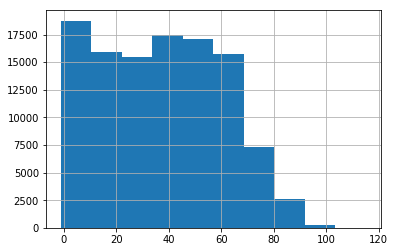

In [21]:
# histogram on Age 
df.Age.hist();

The above histogram indicates the Age is screwed to the left - with a higher counts from ages -1 to around 10

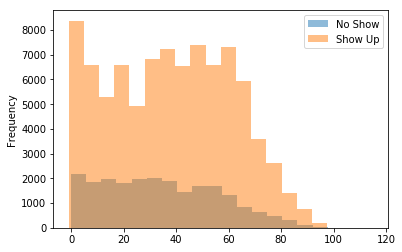

In [22]:
# histogram based on whether the Patient was  no-show or not
df[no_show].Age.plot(kind='hist', alpha=0.5, label='No Show', bins=20)
df[show].Age.plot(kind='hist', alpha=0.5, label='Show Up', bins=20)
plot.legend();

The above indicates there are more patients show up for their Appointments ... seems Patients in their -1 (young infants) and in their late 30's to 70's are have recorded the highest numbers of not showing up. 

> **Question**
> Are older Patients more likely to  be a no-show ? (using Mean Age)

No_show
No     37.790064
Yes    34.317872
Name: Age, dtype: float64


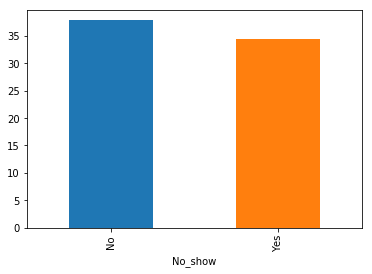

In [23]:
# Grouping Data by No_show - find mean Age and plot it
print(df.groupby('No_show').Age.mean())
df.groupby('No_show').Age.mean().plot(kind='bar');

No-show Patients have a lower mean age than their counterparts, by 3 years

### Variable : Gender 

In [30]:
# Total Number Female (F) vs Male (M) Patients
total_gender = df.Gender.value_counts()
total_gender

F    71837
M    38685
Name: Gender, dtype: int64

In [31]:
# Total Number Female (F) vs Male (M) Patients
noshow_gender = df[no_show].Gender.value_counts()
noshow_gender

F    14591
M     7723
Name: Gender, dtype: int64

There are more Female Patients than Male Patients, 

> **Question**
Does Gender affect whether or not the patient is a no-show ?

In [32]:
(noshow_gender / total_gender) * 100

F    20.31126
M    19.96381
Name: Gender, dtype: float64

Above indicates around 20.31% of the Females are no-show  vs around 19.96% of the Males are a no-show , indicating the 2 Genders are roughly equally represented on the no-show list

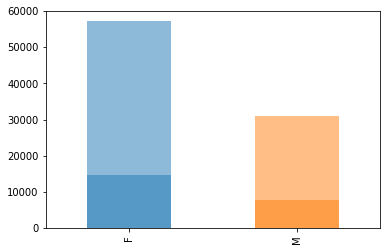

In [119]:
df[no_show].Gender.value_counts().plot(kind='bar', alpha=0.5, label='No show')
df[show].Gender.value_counts().plot(kind='bar', alpha=0.5, label='Show Up');

Above displays, that generally there are more Female Patients than Males , more patients show up

### Variable : Diff in Days between Scheduled and Appointment Days  
> **Question** Does the period (in days) between the ScheduleDay and AppoinmentDay have effect on the patient not showing up (and vice-versa) ?

In [34]:
# Mean diff in days between Scheduled and Appointment Days
df.diff_indays.mean()

10.18425290892311

In [37]:
# Min diff in days between Scheduled and Appointment Days
df.diff_indays.min()

0

In [38]:
# Max diff in days between Scheduled and Appointment Days
df.diff_indays.max()

179

In [39]:
df[no_show].diff_indays.describe()

count    22314.000000
mean        15.835484
std         16.605600
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: diff_indays, dtype: float64

In [40]:
df[show].diff_indays.describe()

count    88208.000000
mean         8.754659
std         14.550398
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: diff_indays, dtype: float64

**75%** of the no-show patients schedule `0 to 23 days` before next appointment, while their counterpart take `0 to 12 days` before their next appoinment ... it seems the longer a Patient waits till their next AppointmentDay will likely result in a no-show up

### Does the Appointment Day of Week (ie Mon-Fri) affect whether or not Patient is a noshow?

In [122]:
#get Appointment Day of Week
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

df['ScheduledDate'] = df.ScheduledDay.dt.date
df['AppointmentDate'] = df.AppointmentDay.dt.date
df['dayOfWeek'] = df.AppointmentDay.dt.dayofweek

In [123]:
df.dayOfWeek.value_counts()

2    25866
1    25638
0    22714
4    19019
3    17246
5       39
Name: dayOfWeek, dtype: int64

In [124]:
prop_AppointmentDay = df[no_show].dayOfWeek.value_counts() / df[no_show].shape[0]
prop_AppointmentDay

1    0.230797
2    0.228198
0    0.210137
4    0.180918
3    0.149547
5    0.000403
Name: dayOfWeek, dtype: float64

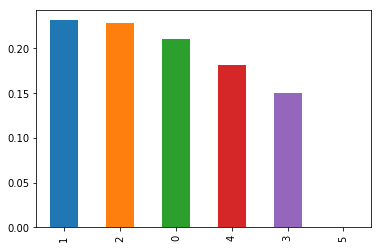

In [126]:
prop_AppointmentDay.plot(kind='bar');

AppointmentDays set on Tuesday has the highest number of no-shows while AppoinmentDays on Saturday has the least number of no-shows 

### Variable :Scholarship Status 
> **Question** Does the Patients' Scholarship Status affect whether or not they show up for their appointment ?

In [44]:
# Total counts of the patients on Scholarship Programme
total_scholar = df.Scholarship.value_counts()
total_scholar

0    99661
1    10861
Name: Scholarship, dtype: int64

In [45]:
# No-show Patients on Scholarship Programs
noshow_scholar = df[no_show].Scholarship.value_counts()
noshow_scholar

0    19736
1     2578
Name: Scholarship, dtype: int64

In [43]:
def get_proportion(original_value_counts, select_value_counts):
    return  (select_value_counts/original_value_counts) * 100

In [47]:
prop_nonscholar =  get_proportion(total_scholar[0], noshow_scholar[0])
prop_nonscholar

19.803132619580378

In [48]:
prop_scholar =  get_proportion(total_scholar[1], noshow_scholar[1])
prop_scholar

23.73630420771568

When a patient is on the Scholarship programme they are 23.74% likely to be a no-show compared to 19.8% given a patient is not the Scholarship programme

### Variable :Handicap

> **Question** Does being A Handicap affect whether or not they show up for their appointment ?

In [73]:
# Total counts of the Handicap patients
total_handicap = df.Handicap.value_counts()
total_handicap

0    108283
1      2239
Name: Handicap, dtype: int64

In [75]:
# Total counts of the Handicap no-show patients
noshow_handicap = df[no_show].Handicap.value_counts()
noshow_handicap

0    21909
1      405
Name: Handicap, dtype: int64

In [76]:
prop_nohandicap =  get_proportion(total_handicap[0], noshow_handicap[0])
prop_nohandicap

20.233092913938474

In [77]:
prop_handicap =  get_proportion(total_handicap[1], noshow_handicap[1])
prop_handicap

18.088432335864223

For Handicap Patients are atleast 18.09% likely to be a no-show compared to their non-Handicap counterparts who are 20.23% likely to be a no-show. 

### Variable :Alcoholism 

> **Question** Does being An Alcoholic affect whether or not they show up for their appointment ?

In [69]:
# Total counts of the patients with Alcoholism
total_alcohol = df.Alcoholism.value_counts()
total_alcohol

0    107162
1      3360
Name: Alcoholism, dtype: int64

In [70]:
# Total counts of the no_show patients with Alcoholism
noshow_alcohol = df[no_show].Alcoholism.value_counts()
noshow_alcohol

0    21637
1      677
Name: Alcoholism, dtype: int64

In [71]:
prop_noalcohol =  get_proportion(total_alcohol[0], noshow_alcohol[0])
prop_noalcohol

20.190925887908026

In [72]:
prop_alcohol =  get_proportion(total_alcohol[1], noshow_alcohol[1])
prop_alcohol

20.148809523809526

For Alcoholic Patients are atleast 20.15% likely to be a no-show compared to their non-Alcoholic counterparts who are 20.19% likely to be a no-show. 

### Variable :Diabetes

> **Question** Does having Hypertension whether or not they show up for their appointment ?

In [65]:
# Total counts of the patients on Diabetes
total_diabetes = df.Diabetes.value_counts()
total_diabetes

0    102579
1      7943
Name: Diabetes, dtype: int64

In [66]:
# Total counts of the no-show patients on Diabetes 
noshow_diabetes = df[no_show].Diabetes.value_counts()
noshow_diabetes

0    20884
1     1430
Name: Diabetes, dtype: int64

In [67]:
prop_nodiabetes =  get_proportion(total_diabetes[0], noshow_diabetes[0])
prop_nodiabetes

20.35894286354907

In [68]:
prop_diabetes =  get_proportion(total_diabetes[1], noshow_diabetes[1])
prop_diabetes

18.00327332242226

For Patients have Diabetes they atleast 18% likely to be a no-show compared to their counterparts without Diabetes who are 20.36% likely to be a no-show

### Variable :Hypertension  (Statistics and Visualizations)

> **Question** Does having Hypertension whether or not they show up for their appointment ?

In [62]:
# Total counts of the patients on Hypertension
total_hyper = df.Hypertension.value_counts()
total_hyper

0    88721
1    21801
Name: Hypertension, dtype: int64

In [60]:
# No-show Patients with on Hypertension
noshow_hyper = df[no_show].Hypertension.value_counts()
noshow_hyper

0    18542
1     3772
Name: Hypertension, dtype: int64

In [63]:
prop_nohyper =  get_proportion(total_hyper[0], noshow_hyper[0])
prop_nohyper

20.89922340821226

In [64]:
prop_hyper =  get_proportion(total_hyper[1], noshow_hyper[1])
prop_hyper

17.301958625751112

For Patients have Hypertension they atleast 17.3% likely to be a no-show compared to their counterparts without Hypertension who are 20.9% likely to be a no-show

### Variable :SMS_received 

> **Question** Does receiving SMS affect whether or not they show up for their appointment ?

In [78]:
# Total counts of the patients who recived SMS
total_sms = df.SMS_received.value_counts()
total_sms

0    75040
1    35482
Name: SMS_received, dtype: int64

In [79]:
# Total counts of the no-show patients who recived SMS
noshow_sms = df[no_show].SMS_received.value_counts()
noshow_sms

0    12530
1     9784
Name: SMS_received, dtype: int64

In [80]:
prop_nosms =  get_proportion(total_sms[0], noshow_sms[0])
prop_nosms

16.69776119402985

In [81]:
prop_sms =  get_proportion(total_sms[1], noshow_sms[1])
prop_sms

27.574544839637

For Patients who received SMS are atleast 27.27% likely to be a no-show compared to their counterparts who did not receive SMS at 16.7% likely to be a no-show

### Research Question 1 : Does Gender and being on Scholarship Programme affect whether or not Patients are a no-show ?

In [91]:
# grouping the noshow data by Gender and Scholarship - find count columns on 
df[no_show].groupby(['Gender', 'Scholarship']).No_show.count()


Gender  Scholarship
F       0              12485
        1               2106
M       0               7251
        1                472
Name: No_show, dtype: int64

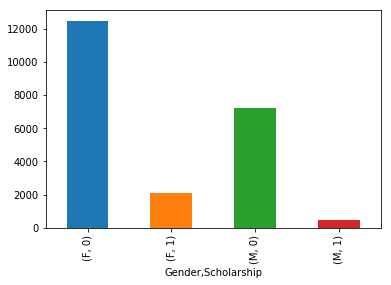

In [94]:
df[no_show].groupby(['Gender', 'Scholarship']).No_show.count().plot(kind='bar');

Generally, Patients without scolarships are more likely to be no-shows compared to their counterparts with scholarships; Females are more than males therefore their counts on all cases is more than their male counterparts

### Research Question 2 : Does Having Hypertension and being on a Scholarship  affect whether or not Patients are a no-show ?

In [101]:
# grouping the noshow data by Hypertension and Scholarship - find count columns on 
df[no_show].groupby(['Hypertension', 'Scholarship']).No_show.count()


Hypertension  Scholarship
0             0              16336
              1               2206
1             0               3400
              1                372
Name: No_show, dtype: int64

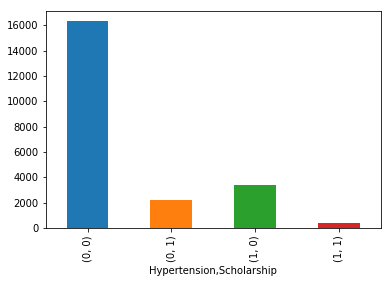

In [102]:
# grouping the noshow data by Hypertension and Scholarship - find count columns on 
df[no_show].groupby(['Hypertension', 'Scholarship']).No_show.count().plot(kind='bar');


Patients without a Scholarship and without Hypertension were more likely to be a no-show compared to their other no-show patients

### Research Question 3 : Does being on the Scholarship Programme and being a Handicap  affect whether or not Patients are a no-show ?


In [112]:
# grouping the noshow data by Handicap and Scholarship - find count columns on 
df[no_show].groupby(['Handicap', 'Scholarship']).No_show.count()


Handicap  Scholarship
0         0              19359
          1               2550
1         0                377
          1                 28
Name: No_show, dtype: int64

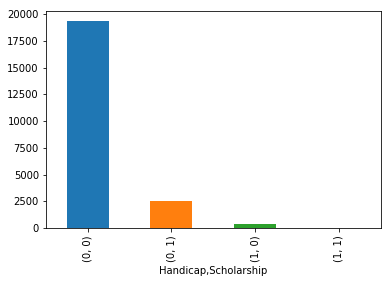

In [114]:
# grouping the noshow data by Handicap and Scholarship - find count columns on 
df[no_show].groupby(['Handicap', 'Scholarship']).No_show.count().plot(kind='bar');


Non-Handicapped Patients without a Scholarship were more likely to be a no-show compared to their counterparts

<a id='conclusions'></a>
## Conclusions

In summary it was established that a Patient is  likely to be a  no-show when :
- when a Patient is not on a Scholarship and is not Handicapped
- when a Patient is not on a Scholarship and does not have Hypertension
- when a Patient is Female and not on Scholarship
- the longer in days (between ScheduledDay and AppointmentDay) 
- based on mean Age, the Patient was younger 
- when their AppointmentDay is a Tuesday

Limitations- we were not able to explore the data further to predict statistically how much the different features affected whether or not the patient was a noshow